In [1]:
import MMM_010519 as MMM
import warnings
import pandas as pd
import numpy as np
import os


Load word per topic probablity matrices  as outputted by the models
Choose the model of intrest to regenerate data
Take into consideration that pi is generated randomly so data can not be fully restored

Claculte direct Likelihoods of models without any further fitting.
MMM models will be fitted first and then likelihood will be calculated on the output models.

In [4]:

# X = pd.read_csv("data/input_data/mutation_counts.csv",index_col=0) #full Mutation counts matrix
ll_dict = {}

chrom_id = '1'
MMM.set_num_of_muts(96)
MMM.set_num_of_topics(12)
MMM.set_num_of_samples(560)

# held out chromosme will later use for testing
test = pd.read_csv(f"data/cross_val_datasets/chrom{chrom_id}.csv").drop("Unnamed: 0", axis=1)
# dataset with a single chromosome out
training_set = pd.read_csv(f"data/cross_val_datasets/full_data_chrom{chrom_id}out.csv").drop("Unnamed: 0", axis=1)

#Train mmm model over the training set, denovo
mmm12 = MMM.fit(training_set, 0.001, 50)  # Change input matrix to whichever matrix you want
ll_dict['mmm12'] = MMM.Theta.log_likelihood2(test, mmm12)

lda12 = MMM.upload_model("/Users/dror/Downloads/LDA_12_term_matrix_1_out.csv","/Users/dror/Downloads/LDA_12_topics_matrix_1_out.csv",12)
ll_dict['lda12'] = MMM.Theta.log_likelihood2(test, lda12)


Changed num of muts to : 96
Changed num of topics to : 12
Changed num of samples to : 560
Converged after 1 iterations
Changed num of topics to : 12


In [5]:
ll_dict

{'mmm12': -1366957.5963309624, 'lda12': -1139873.8677269525}

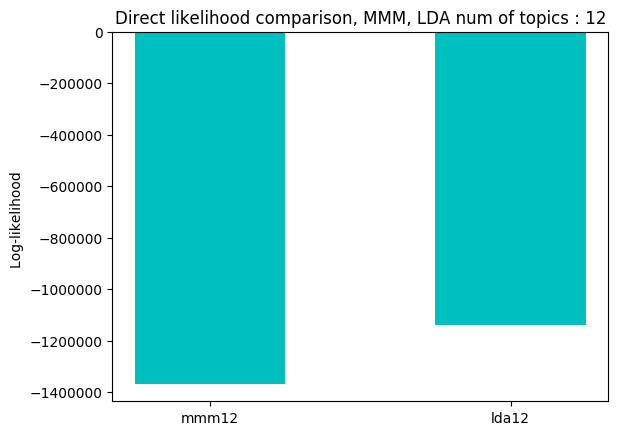

In [27]:
import matplotlib.pyplot as plt

objects = ('mmm12', 'lda12')
y_pos = np.arange(len(objects))
performance = [ll_dict['mmm12'], ll_dict['lda12']]

plt.bar(y_pos, performance, align='center', color = 'c', width = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Log-likelihood ')
plt.title('Direct likelihood comparison, MMM, LDA num of topics : 12')

plt.show()


In [6]:
ll_dict
# directll = pd.DataFrame.from_dict(ll_dict, orient = 'index')
df_ll = pd.DataFrame.from_dict(ll_dict, orient = 'index').rename(columns={'index':'model',0:'score'})
df_ll.to_csv("data/final_data/denovo_models_direct_ll.csv")